## **SALARY PREDICTION OF DATA PROFFESIONS**

## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Loading Data

In [ ]:
df= pd.read_csv("Salary Prediction of Data Professions.csv")
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


## Dimension Of DataSet

In [ ]:
df.shape

(2639, 13)

In [ ]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.tail(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


## Statistic Summary

In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


## Missing Values

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

## Dropping Missing values as Missing values are Minimum

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

## Duplicate Values

In [ ]:
df.duplicated().sum()

161

## Drop Duplicates Values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## Change Data Type from Float to Integer

In [ ]:
df['AGE'] = df['AGE'].astype(int)
df['LEAVES REMAINING'] = df['LEAVES REMAINING'].astype(int)
df['LEAVES USED'] = df['LEAVES USED'].astype(int)
df['RATINGS'] = df['RATINGS'].astype(int)


## Changing from Object to Date time type

In [ ]:
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
df["DOJ"]=pd.to_datetime(df["DOJ"])

## To Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2470 non-null   object        
 1   LAST NAME         2470 non-null   object        
 2   SEX               2470 non-null   object        
 3   DOJ               2470 non-null   datetime64[ns]
 4   CURRENT DATE      2470 non-null   datetime64[ns]
 5   DESIGNATION       2470 non-null   object        
 6   AGE               2470 non-null   int64         
 7   SALARY            2470 non-null   int64         
 8   UNIT              2470 non-null   object        
 9   LEAVES USED       2470 non-null   int64         
 10  LEAVES REMAINING  2470 non-null   int64         
 11  RATINGS           2470 non-null   int64         
 12  PAST EXP          2470 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(5)
memory usage: 270.2+ KB


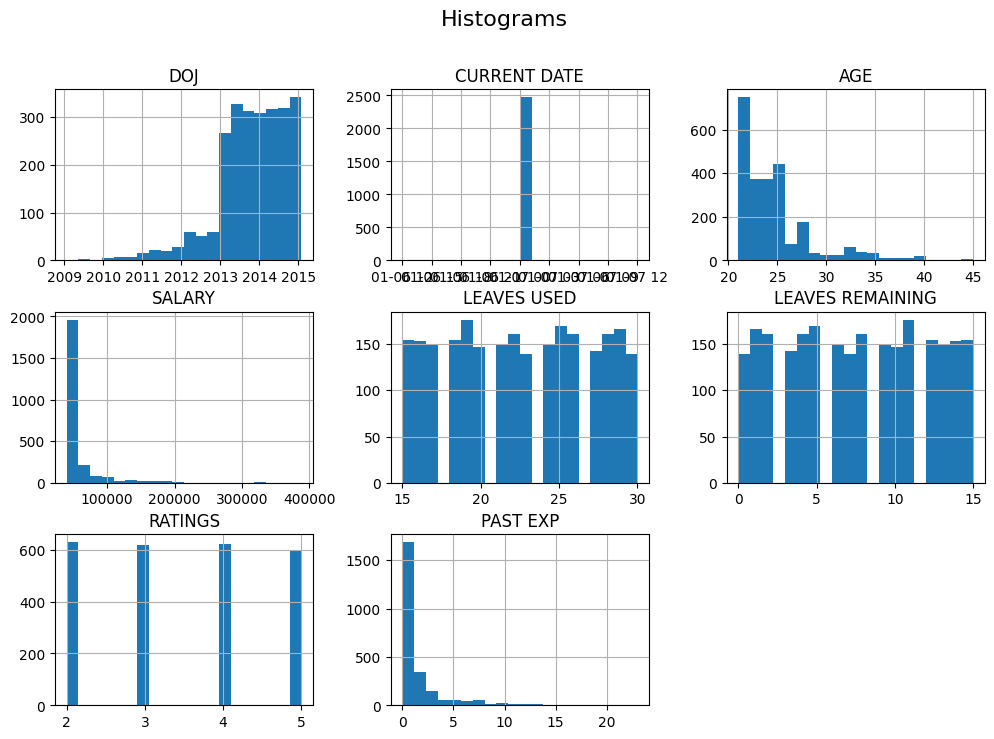

In [ ]:
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms', fontsize=16)
plt.xticks(rotation=45)
plt.show()


## Outliers

Text(0.5, 1.0, 'Outliers Of Salary')

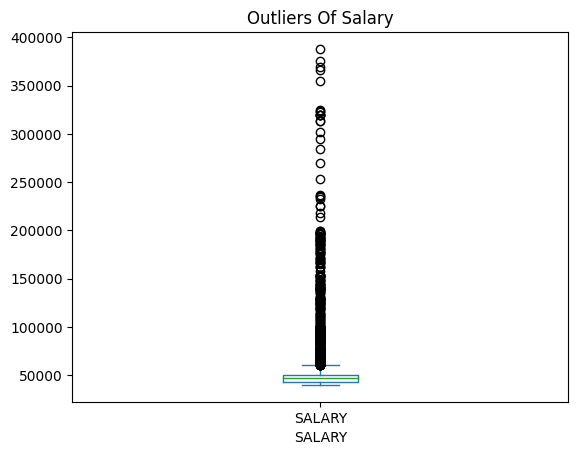

In [ ]:
df["SALARY"].plot(kind="box")
plt.xlabel("SALARY")
plt.title("Outliers Of Salary")


## Lebal Encoding

In [ ]:
# Specify the columns to be label encoded
columns_to_encode = ['SEX', 'UNIT', 'DESIGNATION']

# Apply label encoding to each specified column
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


<ipython-input-69-b0867d51fb35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


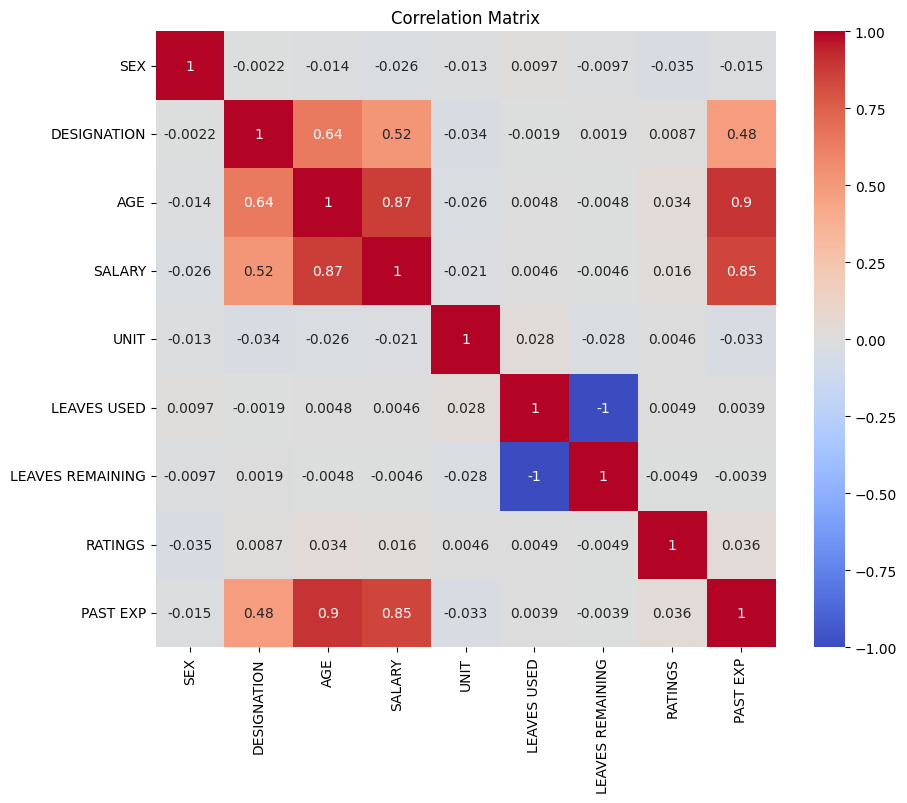

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Dropping the Columns

In [ ]:
#dropping coluns with low correlation
columns_to_drop = ['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING']

df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df)


      DESIGNATION  AGE  SALARY  RATINGS  PAST EXP
0               0   21   44570        2         0
2               0   21   40955        3         0
3               0   22   45550        3         0
6               0   22   40339        5         0
8               4   28   63478        3         1
...           ...  ...     ...      ...       ...
2634            5   36  185977        5        10
2635            0   23   45758        2         0
2636            0   21   47315        5         0
2637            0   24   45172        3         1
2638            0   24   49176        2         2

[2470 rows x 5 columns]


## Splitting into Test and Training data

In [ ]:
X=df.drop(columns=['SALARY'])
Y=df['SALARY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
X_test

,DESIGNATION,AGE,RATINGS,PAST EXP
1347,3,34,2,11
1852,4,27,4,4
779,0,21,3,0
244,0,21,5,0
73,5,38,4,9
...,...,...,...,...
774,0,21,4,0
251,4,27,5,0
1367,4,26,2,0
258,2,41,5,14


In [ ]:
Y_test

1347    138812
1852     57569
779      48587
244      46002
73      193621
         ...  
774      48343
251      51532
1367     58872
258     375647
690      46601
Name: SALARY, Length: 494, dtype: int64

## MACHINE LEARNING


1:  Linear Regression
2:  Random Forest
3:  Rigde Regression







## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  80.7677351820623


In [ ]:
predictions=model.predict(X_test)

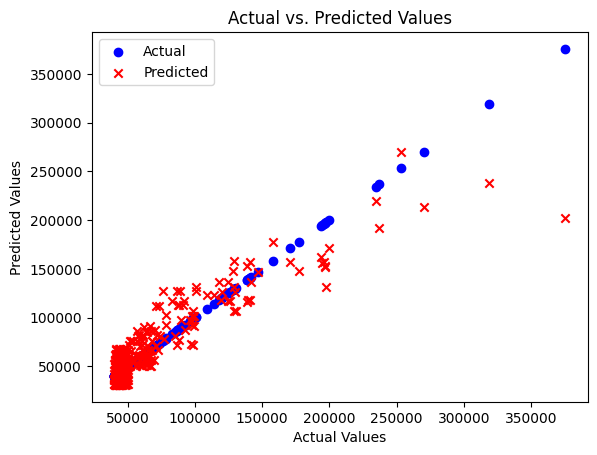

In [ ]:
actual_values = Y_test
predicted_values = predictions
# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual', marker='o')

# Plot predicted values in red
plt.scatter(Y_test, predictions, color='red', label='Predicted', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)

# Print the results
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.807677351820623
Mean Absolute Error (MAE): 11452.445162167052
Mean Squared Error (MSE): 271261068.4522693


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your features and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, Y_train)
predictions = rf_model.predict(X_test)

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)


print("R-squared :",r2)
print('Mean Absolute Error :',mae)
print("Mean Squared Error :",mse)


R-squared : 0.9316426225565583
Mean Absolute Error : 4385.282462382963
Mean Squared Error : 88763326.05816041


In [ ]:
print("Accuracy using Random Forest Regressor : ",rf_model.score(X_test,Y_test)*100)

Accuracy using Random Forest Regressor :  93.16426225565583


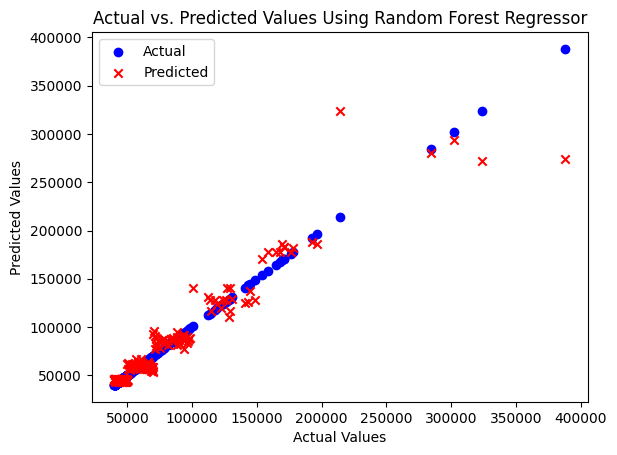

In [ ]:
actual_values = Y_test
predicted_values = predictions
# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual', marker='o')

# Plot predicted values in red
plt.scatter(Y_test, predictions, color='red', label='Predicted', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Using Random Forest Regressor')
plt.legend()
plt.show()

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, Y_train)
predictions = ridge_model.predict(X_test)


r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)


print("R-squared :",r2)
print('Mean Absolute Error :',mae)
print("Mean Squared Error :",mse)

R-squared : 0.7693771788392915
Mean Absolute Error : 11761.72130883091
Mean Squared Error : 299468022.86378187


In [ ]:
print("Accuracy using Ridge Regression : ",ridge_model.score(X_test,Y_test)*100)

Accuracy using Ridge Regression :  76.93771788392915


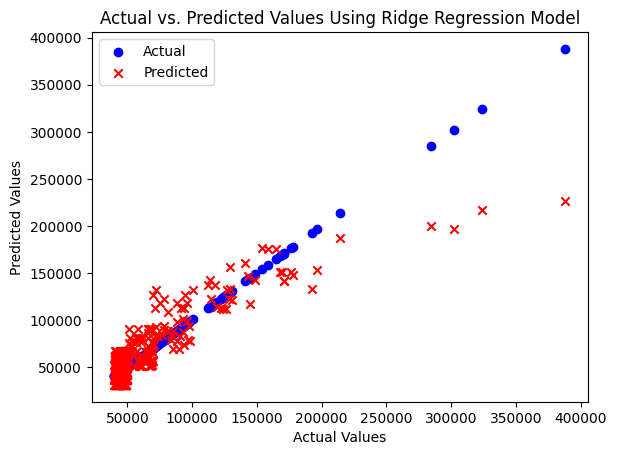

In [ ]:
actual_values = Y_test
predicted_values = predictions
# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual', marker='o')

# Plot predicted values in red
plt.scatter(Y_test, predictions, color='red', label='Predicted', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Using Ridge Regression Model')
plt.legend()
plt.show()


## Accuracy
*   Linear Regression : 80.6
*   Random Forest : 93.16
*   Ridge Regression : 76.93

